In [1]:
import numpy as np
from sklearn.decomposition import PCA
import scipy.io as sio
np.random.seed(7)

In [2]:
Data=sio.loadmat('/content/drive/MyDrive/datasets/PaviaU (1).mat')['paviaU']
Label=sio.loadmat('/content/drive/MyDrive/datasets/PaviaU_gt (12).mat')['paviaU_gt']

Data=np.reshape(Data,(Data.shape[0]*Data.shape[1],Data.shape[2]))

Label=np.reshape(Label,(Label.shape[0]*Label.shape[1]))

Labels,counts=np.unique(Label,return_counts=True)

Data=Data[Label>0,:]
Label=Label[Label>0]

Labels,counts=np.unique(Label,return_counts=True)


Labels,counts=np.unique(Label,return_counts=True)

In [3]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Data)
Data= scaler.transform(Data)

In [4]:
from sklearn.model_selection import train_test_split

testRatio=0.20

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=testRatio, random_state=345,
                                                        stratify=Label)

In [5]:

X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
X_train=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)

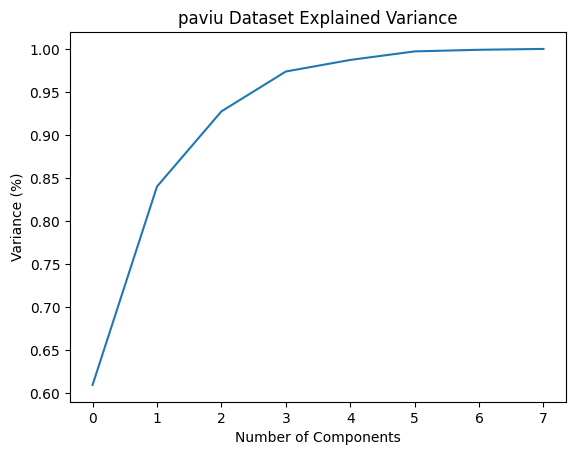

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('paviu Dataset Explained Variance')
plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
import pandas as pd
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))

Accuracy : 92.41467975689575
Cohen Kappa Score : 89.89029008909813
              precision    recall  f1-score   support

           1       0.91      0.96      0.94      1326
           2       0.95      0.97      0.96      3730
           3       0.86      0.69      0.76       420
           4       0.95      0.94      0.94       613
           5       1.00      1.00      1.00       269
           6       0.90      0.84      0.87      1006
           7       0.95      0.76      0.84       266
           8       0.80      0.88      0.84       737
           9       1.00      0.99      1.00       189

    accuracy                           0.92      8556
   macro avg       0.93      0.89      0.91      8556
weighted avg       0.92      0.92      0.92      8556

